### BioSig Exercises WS 22/23
---

# Exercise 02 - 04.11.2022

In [30]:
# Imports und basic setup
# Try to use the Lab Widgets or if not possible the NB widgets and if nothing works just static plots
try:
    %matplotlib widget
    print('Using widgets')
except:
    try:
        print('Using Notebook widgets')
        %matplotlib notebook
    except:
        print('Using static backend')
        %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Using Notebook widgets
Using static backend


## Exercise 2.1: Signal Frequencies

Basically every biomedical signal has some sort of periodic behavior and for many biosignals a change in its fundamental frequency is an important biomarker to indicate a change in body function.
A few examples:

- An increase in heart rate indicates higher metabolic expenditure
- A change of frequency in our brainwaves marks the beginning of a new sleep phase
- A change in step frequency can be an early indicator for neurodegenerative diseases like Parkinson

But let's start simple and understand what we mean when we talk about the *frequency* of the signal.

a) Below are two signals. Describe the nature of their frequency qualitatively.

b) Give an example of a biosignal that behaves as the signal in panel A and an example of one that behaves as the one in panel B.

c) Calculate the frequency of the signal in panel A by hand.

d) What is the frequency of the signal in panel B at the beginning of the signal and at the end of the signal?

![sine waves](media/sines.png)

## Exercise 2.2.: Creating periodic signals in Python

Try to recreate the signals above in Python.
For this create a function (see below) that takes a frequency in $Hz$ (`f_0`), a *linear frequency change factor* in $Hz/s$ (`a`), the length of the desired signal in $s$ (`T`) and the sampling rate of the signal in $Hz$ (`f_s`) and then generates a cosine wave with the given frequency. See part a) for more details.

a) A simple cosine function is defined as: $y(t) = \cos(t)$, where $t$ is the time in seconds. Write down the mathematical function for a cosine wave with a constant frequency $f$ (1), a cosine wave with a general time dependent frequency (2), and a cosine wave with a linearly changing frequency starting from $f_0$ and increasing by $a$ every second, where $a\ge 0$ (3).

a) Create the described function using the skeleton code below. Use a the mathematical description from part a) for your implementation.

Tip: Build your function step by step. First, try to create signals with constant frequencies and then move to signals with changing frequencies.

b) Plot approximately the same signals you can see above (with appropriate x- and y-axis labels) using your function. Use a sampling rate of 2000 Hz for the first signal and a sampling rate of 1000 Hz for the second signal.

In [31]:
def create_signal(f_0, a, T, f_s=500):
    """Create a cos signal with given frequency characteristics.
    
    Args:
        f_0: The frequency of the signal in Hz
        a: Scaling factor for the linear frequency change of the signal in Hz/s
            a=0 -> no change in frequency,
            a>0 -> increase over time
            a<0 -> not defined 
        T: The length of the signal in seconds
        f_s: The sampling rate of the signal in Hz
    
    Returns:
        t: The time axis values of the signal
        y: The y values of the signal
    """
    # Calulate the t values using the length of the signal and the sampling rate
    # TODO: YOUR CODE HERE
    t = np.arange(0, T, 1/f_s)
    
    # Calculate the frequency over time using the factor a
    # TODO: YOUR CODE HERE
    f = f_0 + a*t
    
    # Calculate the final cos wave using np.cos
    # TODO: YOUR CODE HERE
    y = np.cos(2*np.pi*f*t)
    
    return t, y
    

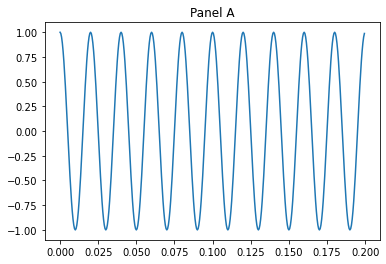

In [32]:
# Plot the signal from panel A

# Get t and y from the create signal function:
# TODO: YOUR CODE HERE
t, y = create_signal(50, 0, 0.2, 2000)

# Plot the signal
plt.figure(1)
plt.title('Panel A')
# TODO: YOUR CODE HERE
plt.subplot(111)
plt.plot(t,y)



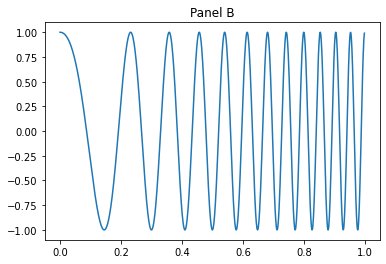

In [33]:
# Plot the signal from panel B

# Get t and y from the create signal function:
# TODO: YOUR CODE HERE

t_b, y_b = create_signal(2, 10, 1, 1000)
# Plot the signal
plt.figure(2) 

plt.title('Panel B')
# TODO: YOUR CODE HERE
plt.subplot(111)
plt.plot(t_b, y_b)


### Exercise 2.3: Intuitive understanding of the sampling problem

A good way to understand the influence of parameters on a given problem/algorithm is to interactively modify their values to see the results.
Python/Jupyter provides a simple way to get this type of interactivity: [Jupyter Widgets](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)

Below you can find a simple example to plot a linear function with interactive slope and offset.

a) Modify the example below to make all parameters of your `create_signal` function interactive.

b) Play around with the parameters. 
What happens when $f_s = f_0$, $f_s = 2\cdot f_0$, $f_s < f_0$, or $f_s >> f_0$? What are the implications for biosignal measurements?

In [34]:
from ipywidgets import interact

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

def plot_line(a, b):
    ax.clear()  # Remove the last plot
    x = np.arange(100) / 100
    y = a * x + b
    ax.plot(x, y, '.-') # Plot the new plot into the specified subplot
    ax.set_xlabel('time [s]')

interact(plot_line, a=(-10,10,0.5), b=(-5, 5, 0.5));

interactive(children=(FloatSlider(value=0.0, description='a', max=10.0, min=-10.0, step=0.5), FloatSlider(valu…

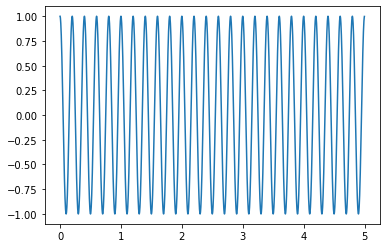

interactive(children=(FloatSlider(value=5.0, description='f_0', max=50.0, min=0.1), FloatSlider(value=0.0, des…

<function __main__.plot_cos(f_0=5, a=0, T=5, f_s=500)>

In [40]:
# Create your own interactive plot!

# create one function that combines creating the sine and plotting it
# Use the function above as example
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

def plot_cos(f_0=5, a=0, T=5, f_s=500):
    ax.clear()
    # TODO: YOUR CODE HERE
    t = np.arange(0, T, 1/f_s)
    f = f_0 + a*t
    y = np.cos(2*np.pi*f*t)
    ax.plot(t, y, '.-')
    ax.set_xlabel('time[s]')
# Use interact to make everything interactive
# TODO: YOUR CODE HERE

interact(plot_cos, f_0=(0.1,50,0.1), a=(0, 20, 0.1), T=(0.2, 10, 0.2), f_s=(1, 2000, 1))